<div style="line-height:0.5">
<h1 style="color:#0AE42F  "> Anomaly detection </h1>
</div>
<h4> Anomaly detection with PCA and DBSCAN. </h4>
<div style="line-height:1.5">
<div style="margin-top: -10px;">
<span style="display: inline-block;">
    <h3 style="color: lightblue; display: inline;">Keywords:</h3> PCA + StandardScaler + fillna + labels_
</span>
</div>
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, normalize 

In [3]:
# Load the dataset from CSV file 
X = pd.read_csv('./data_to_use/credit_cards_kaggle.csv')
X.head()

In [4]:
# Remove id column, since it is not relevant for clustering
X = X.drop('CUST_ID', axis=1)
# Fill missing values using the previous non-missing value on the column
X.fillna(method='ffill', inplace=True)
X.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
X.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [37]:
""" Normalizing data is fundamental with unsupervised learning algorithms since they are sensitive to distance measures """
# Standardize features by removing the mean and scaling to unit variance.
scaler = StandardScaler()
X_s = scaler.fit_transform(X)
# Scale input vectors individually to unit norm (vector length).
X_norm = pd.DataFrame(normalize(X_s))
X_norm.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.312038,-0.106331,-0.181129,-0.152156,-0.148808,-0.198985,-0.343796,-0.289304,-0.301518,-0.287892,-0.202942,-0.217975,-0.409413,-0.225497,-0.130160,-0.224036,0.153753
1,0.219928,0.037539,-0.131224,-0.099751,-0.127038,0.728177,-0.341439,-0.189662,-0.256269,0.160403,0.030762,-0.165387,0.192455,0.228782,0.024353,0.065458,0.100798
2,0.126684,0.146785,-0.030505,0.030851,-0.128792,-0.132251,0.359775,0.757449,-0.259805,-0.191342,-0.134881,-0.030888,0.234046,-0.108741,-0.028363,-0.148900,0.102189
3,0.020571,-0.426063,0.097223,0.228832,-0.190449,-0.154451,-0.424878,-0.167299,-0.384185,-0.108474,-0.138062,-0.231084,0.346093,-0.250827,-0.041942,-0.220185,0.151110
4,-0.151630,0.218959,-0.195282,-0.146778,-0.192118,-0.197278,-0.428601,-0.168765,-0.387551,-0.285424,-0.201202,-0.233109,-0.382671,-0.153993,-0.110323,-0.222114,0.152435


<h2 style="color:#0AE42F  "> Principal Component Analysis </h2>

In [12]:
##### Perform PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
X_principal = pca.fit_transform(X_norm)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['PC1','PC2']
X_principal.head()

,PC1,PC2
0,-0.489949,-0.679976
1,-0.519099,0.544826
2,0.330633,0.268881
3,-0.481657,-0.097612
4,-0.563512,-0.482506


<div style="line-height:0.45">
<h1 style="color:#0AE42F  "> DBSCAN clustering model </h1>
<h4> Density-Based Spatial Clustering of Applications with Noise.  
</h4>
<div style="line-height:1.1">
<div>

+ Finds core samples of high density and expands clusters from them.     
+ Good for data which contains clusters of similar density.   

In [21]:
# Create a DBSCAN model and fit it to the normalized data
db_model = DBSCAN(eps=0.05, min_samples=10).fit(X_norm)

# Get the labels assigned by the DBSCAN algorithm
labels_model = db_model.labels_
labels_model

array([-1, -1, -1, ..., -1, -1, -1])

In [28]:
# DBSCAN with reduced dataset
db_model = DBSCAN(eps=0.05, min_samples=10).fit(X_principal)
labels_model = db_model.labels_
labels_model

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
# Get unique labels and calculate histogram of labels
uni_lahb = np.unique(labels_model)
np.histogram(labels_model, bins=len(uni_lahb))

(array([  39, 8903,    8]),
 array([-1.        , -0.33333333,  0.33333333,  1.        ]))

(array([3.900e+01, 8.903e+03, 8.000e+00]),
 array([-1.        , -0.33333333,  0.33333333,  1.        ]),
 <BarContainer object of 3 artists>)

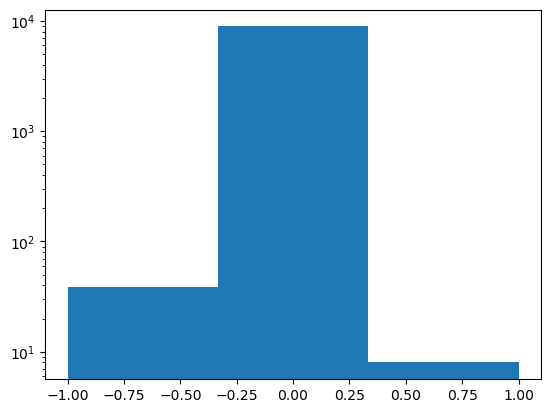

In [30]:
# Plot a histogram of the cluster labels (in a log scale)
plt.hist(labels_model, bins=len(uni_lahb), log=True)

In [31]:
# Calculate the number of clusters (excluding the noise cluster labeled as -1)
num_clusters = len(np.unique(labels_model)-1)
# Count the number of data points labeled as anomalies (noise cluster)
anomaly = list(labels_model).count(-1)

print("num_clusters is: " , num_clusters)
print("anomaly is: " , anomaly)

num_clusters is:  3
anomaly is:  39


In [26]:
# Select only the data points that are labeled as anomalies
X_anomaly = X.iloc[np.argwhere(labels_model==-1).reshape((-1,))]
X_anomaly.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


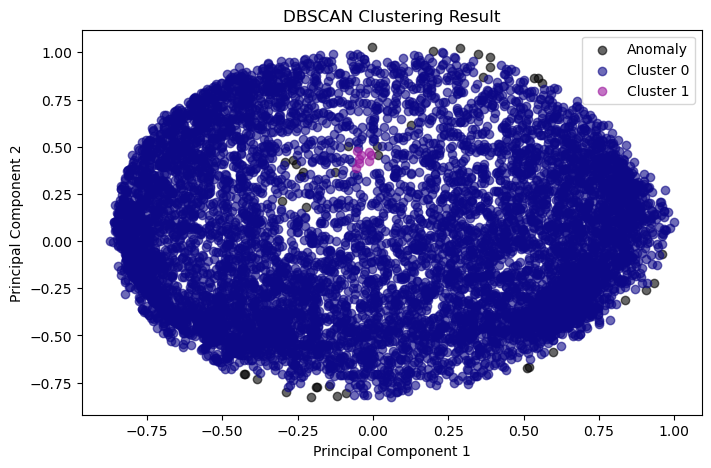

In [47]:
""" Visualize clusters and anomalies. """

# Plot the data points of each cluster
plt.figure(figsize=(8, 5))
for label in np.unique(labels_model):
    # If cluster with noise (anomaly)
    if label == -1:  
        color = 'black'
        label_name = 'Anomaly'
    else:
        maps_col = matplotlib.colormaps.get_cmap('plasma')
        # Assign different colors to clusters
        color = maps_col(label / num_clusters)  
        label_name = f'Cluster {label}'
    
    # Get the indices of data points belonging to the current cluster
    cluster_indices = np.where(labels_model == label)[0]

    # Scatter plot the data points of the current cluster
    plt.scatter(X_principal.loc[cluster_indices, 'PC1'], X_principal.loc[cluster_indices, 'PC2'],
                color=color, label=label_name, alpha=0.6)

# Set plot labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering Result')

plt.legend()
plt.show()
